# Tarefa: 07 de maio de 2025

## 💡 Ideia central
Iniciar as primeiras simulações em Julia seguindo o exemplo da seção 1.7.2 do livro _Multiscale Methods Averaging and Homogenization_.



## 🎯 Apresentação dos modelos

O modelo determinístico apresentado abaixo:

$$
\begin{aligned}
    \frac{dx}{dt} &= x - x^3 + \frac{\lambda}{\varepsilon} y_2, \\
    \frac{dy_1}{dt} &= \frac{10}{\varepsilon^2} (y_2 - y_1), \\
    \frac{dy_2}{dt} &= \frac{1}{\varepsilon^2} (28 y_1 - y_2 - y_1 y_3), \\
    \frac{dy_3}{dt} &= \frac{1}{\varepsilon^2} \left( y_1 y_2 - \frac{8}{3} y_3 \right).
\end{aligned}
$$

O modelo estocástico é dado por:
$$
    \frac{dX}{dt} = X - X^3 + \sigma \frac{dW}{dt}
$$

Onde:

$$
    \sigma^2 = 2\lambda^2 \int_0^\infty \frac{1}{T} \left( \lim_{T \to \infty} \int_0^T \psi^s(y) \psi^{t+s}(y) \, ds \right) dt.
$$


## 🚀 Análise de dados

O presente código visa realizar as primeiras simulações do sistema sem tanta preocupação com detalhes da linguagem e uma manipulação matemática tão rigorosa. Interprete a seção como um primeiro passo.

In [2]:
using DifferentialEquations, Plots, CSV, DataFrames

In [5]:
# Sistema original

function f(du, u, p, t)
    lambda = 1.0
    epsilon = 0.1

    x, y1, y2, y3 = u

    du[1] = x - x^3 + (lambda/epsilon) * y2
    du[2] = (10 / epsilon^2) * (y2 - y1)
    du[3] = (1 / epsilon^2) * (28*y1 - y2 - y1*y3)  
    du[4] = (1 / epsilon^2) * (y1*y2 - (8/3)*y3)
end

u0 = [0.1, 0.01, 0.01, 0.01]
tspan = (0.0, 20.0)
prob = ODEProblem(f, u0, tspan)
solucao_deterministico = solve(prob, abstol=1e-8, reltol=1e-6, maxiters=1_000_000)

df = DataFrame(solucao_deterministico)
rename!(df, [:timestamp, :x, :y1, :y2, :y3])
CSV.write("csv/sistema_deterministico.csv", df)

"csv/sistema_deterministico.csv"

In [9]:
# Sistema estocástico
sigma = 7.25
x0 = 0.1
tspan = (0.0, 100.0)

f1(X, p, t) = X - X^3
f2(X, p, t) = sigma

W = WienerProcess(0.0, 0.0, 0.0)
prob = SDEProblem(f1, f2, x0, tspan, noise=W)
solucao_estocastico = solve(prob, SRIW1(), dt=0.01)

df = DataFrame(solucao_estocastico)
rename!(df, [:timestamp, :x])
CSV.write("csv/sistema_estocastico.csv", df)

"csv/sistema_estocastico.csv"

In [ ]:
# Sistema estocástico (com ensemble)

sigma = 7.25
x0 = 0.1
tspan = (0.0, 100.0)

f1(X, p, t) = X - X^3
f2(X, p, t) = sigma

W = WienerProcess(0.0, 0.0, 0.0)
prob = SDEProblem(f1, f2, x0, tspan, noise=W)

ensemble_prob = EnsembleProblem(prob)
ensemble_sol = solve(ensemble_prob, SRIW1(), dt=0.01, trajectories=100)

EnsembleSolution Solution of length 1000 with uType:
RODESolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, NoiseProcess{Float64, 1, Float64, Float64, Float64, Vector{Float64}, typeof(DiffEqNoiseProcess.WHITE_NOISE_DIST), typeof(DiffEqNoiseProcess.WHITE_NOISE_BRIDGE), Nothing, false, ResettableStacks.ResettableStack{Tuple{Float64, Float64, Float64}, false}, ResettableStacks.ResettableStack{Tuple{Float64, Float64, Float64}, false}, RSWM{Float64}, Nothing, RandomNumbers.Xorshifts.Xoroshiro128Plus}, Nothing, SDEProblem{Float64, Tuple{Float64, Float64}, false, SciMLBase.NullParameters, NoiseProcess{Float64, 1, Float64, Float64, Float64, Vector{Float64}, typeof(DiffEqNoiseProcess.WHITE_NOISE_DIST), typeof(DiffEqNoiseProcess.WHITE_NOISE_BRIDGE), Nothing, false, ResettableStacks.ResettableStack{Tuple{Float64, Float64, Float64}, false}, ResettableStacks.ResettableStack{Tuple{Float64, Float64, Float64}, false}, RSWM{Float64}, Nothing, RandomNumbers.Xorshifts.Xoroshiro128Pl

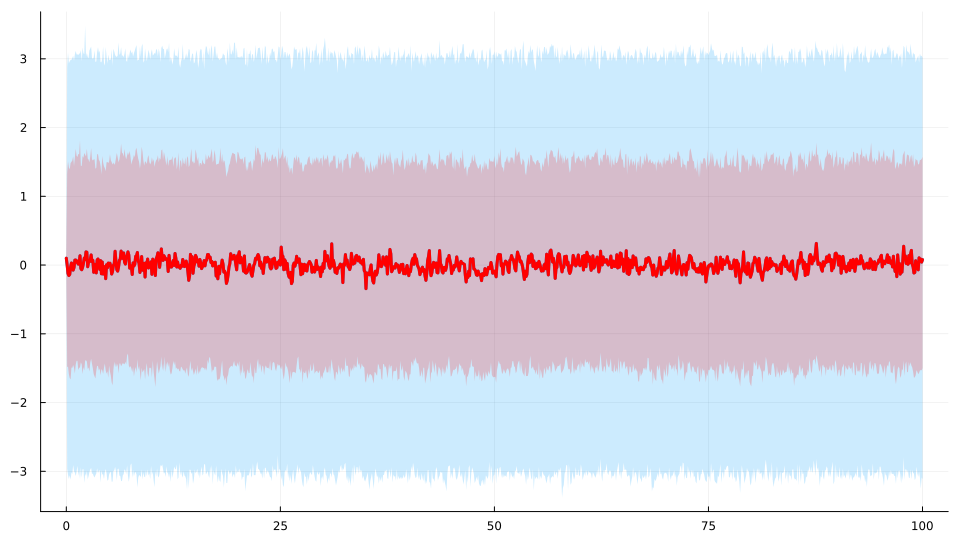

## 📋 Afazeres

1. Fazer uma tabela: cada linha integra o sistema -> trajetoria de uma particula (aonde a particula tá em cada instante t). Cada linha é uma trajetoria diferente e cada coluna é uma particula diferente. Análise de variancia, média, desvio padrão, plot de gráfico de calor, e demais caracteristicas

2. determinar $\sigma$


https://discourse.julialang.org/t/saving-outputs-in-csv-file/44493